In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [2]:
from sympy import init_printing, symbols, Matrix
from warnings import filterwarnings
from IPython.display import Image

In [3]:
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

# Graphs and networks
# Incidence matrices
# Kirchhoff's laws

* This lecture is about the application of matrices

## Graphs and networks

* In this instance we refer to nodes and there connections called edges
* Consider the graph below:

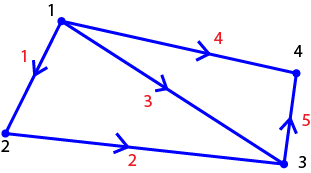

In [4]:
Image(filename = 'Graph1.png')

* We will call the nodes *n* (columns), in this case *n* = 4
* The edges (connections) will be called *m* (rows), with *m* = 5 in this case
* This will give us a *m*&#215;*n* = 5&#215;4 matrix
* We will have to give a direction to every edge

## The incidence matrix

* This corresponds to the graph above

In [5]:
A = Matrix([[-1, 1, 0, 0], [0, -1, 1, 0], [-1, 0, 1, 0], [-1, 0, 0, 1], [0, 0, -1, 1]])
A
# For each row (edge) look only at that edge (line)
# In the case of row (edge, line) 1, the arrow point away from node 1, hence the first -1 in the matrix
# The arrow point towards node 2, hence the 1
# It does not point to nodes 3 and 4, hence the 0's

⎡-1  1   0   0⎤
⎢             ⎥
⎢0   -1  1   0⎥
⎢             ⎥
⎢-1  0   1   0⎥
⎢             ⎥
⎢-1  0   0   1⎥
⎢             ⎥
⎣0   0   -1  1⎦

* Edges 1, 2, and 3 form a loop
* Notice for the first loop (edges 1, 2, and 3) the corresponding third row is a linear combination of rows 1 and 2
* Intuitively, you can see that you can reach node 3 from node 1 by a combination of edges (rows) 1 and 2

In [6]:
A.rref()

⎛⎡1  0  0  -1⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  -1⎥           ⎟
⎜⎢           ⎥           ⎟
⎜⎢0  0  1  -1⎥, (0, 1, 2)⎟
⎜⎢           ⎥           ⎟
⎜⎢0  0  0  0 ⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  0  0 ⎦           ⎠

* We note that we have three pivot columns, hence a rank, *r* = 3
* We have one column without a pivot and will thus have one in the nullspace (*n* - *r* = 4 - 3 = 1)

In [7]:
A.nullspace()

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎣⎣1⎦⎦

*  The basis for this subspace is one dimensional and includes all scalar multiplications of this vector
* The meaning in our example is that nothing will happen when the solutions fall on this line in 4-dimensional space, i.e. no current will flow

* If you think of the solution **x** and every component of **x** being a potential at a node, the matrix multiplication A**x** gives you the potential differences along the edges
* The nullspace would then be the solution where all the potential differences are 0

In [8]:
x1, x2, x3, x4 = symbols('x1, x2, x3, x4')

In [9]:
x_vect = Matrix([x1, x2, x3, x4])
x_vect

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎢x₃⎥
⎢  ⎥
⎣x₄⎦

In [10]:
A * x_vect

⎡-x₁ + x₂⎤
⎢        ⎥
⎢-x₂ + x₃⎥
⎢        ⎥
⎢-x₁ + x₃⎥
⎢        ⎥
⎢-x₁ + x₄⎥
⎢        ⎥
⎣-x₃ + x₄⎦

* For the nullspace, each row now equals 0 (the potential difference between two nodes)

* Let's look at the row space and the nullspace of the row picture
* We now to get the rowspace by transposing the row that contain pivots

In [11]:
A_row = Matrix([[1, 0, 0, -1], [0, 1, 0, -1], [0, 0, 1, -1]]).transpose()
A_row

⎡1   0   0 ⎤
⎢          ⎥
⎢0   1   0 ⎥
⎢          ⎥
⎢0   0   1 ⎥
⎢          ⎥
⎣-1  -1  -1⎦

In [12]:
A

⎡-1  1   0   0⎤
⎢             ⎥
⎢0   -1  1   0⎥
⎢             ⎥
⎢-1  0   1   0⎥
⎢             ⎥
⎢-1  0   0   1⎥
⎢             ⎥
⎣0   0   -1  1⎦

In [13]:
A.transpose()

⎡-1  0   -1  -1  0 ⎤
⎢                  ⎥
⎢1   -1  0   0   0 ⎥
⎢                  ⎥
⎢0   1   1   0   -1⎥
⎢                  ⎥
⎣0   0   0   1   1 ⎦

In [14]:
A.transpose().rref()

⎛⎡1  0  1  0  -1⎤           ⎞
⎜⎢              ⎥           ⎟
⎜⎢0  1  1  0  -1⎥           ⎟
⎜⎢              ⎥, (0, 1, 3)⎟
⎜⎢0  0  0  1  1 ⎥           ⎟
⎜⎢              ⎥           ⎟
⎝⎣0  0  0  0  0 ⎦           ⎠

* Note how the pivot columns are columns 1, 2, and 4
* These represent edges 1, 2, 4
* Note (form the graph above) that thye are independent as they are not a part of a loop
* A graph without a loop (with 1 less edge than nodes) is called a *tree*
* It has a nullspace of

In [15]:
A.transpose().nullspace()

⎡⎡-1⎤  ⎡1 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥, ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦

* The dimension of the nullspace of A<sup>T</sup> is *m* - *r* = number of edges minus (number of nodes - 1)
* &#8756; number of nodes - number of edges + number of loops = 1
* This is Euler's formula and works for all graphs
* It tells you how many independent loops there are

* There is a connection between potentials and currents
* With 5 edges we will have 5 currents, which we can represent as a vector **y**
$$ \overline { y } =\begin{bmatrix} { y }_{ 1 } & { y }_{ 2 } & { y }_{ 3 } & { y }_{ 4 } & { y }_{ 5 } \end{bmatrix} $$
* This relationship is Ohm's law

## Kirchhoff's law

* By the way, Kirchhoff's current law is: A<sup>T</sup>**y** = **0**
* We can look at it in the following way

In [16]:
A.transpose()

⎡-1  0   -1  -1  0 ⎤
⎢                  ⎥
⎢1   -1  0   0   0 ⎥
⎢                  ⎥
⎢0   1   1   0   -1⎥
⎢                  ⎥
⎣0   0   0   1   1 ⎦

In [17]:
y1, y2, y3, y4, y5 = symbols('y1, y2, y3, y4, y5')

In [18]:
y_vect = Matrix([y1, y2, y3, y4, y5])
y_vect

⎡y₁⎤
⎢  ⎥
⎢y₂⎥
⎢  ⎥
⎢y₃⎥
⎢  ⎥
⎢y₄⎥
⎢  ⎥
⎣y₅⎦

In [19]:
A.transpose() * y_vect

⎡-y₁ - y₃ - y₄⎤
⎢             ⎥
⎢   y₁ - y₂   ⎥
⎢             ⎥
⎢y₂ + y₃ - y₅ ⎥
⎢             ⎥
⎣   y₄ + y₅   ⎦

* For row 1 (setting it equal to 0 and looking at graph above tells us that current flows out from node 1 on all these 3 edges
* For row 2 (doing the same as above) we note that for node 2 current flow towards it on edge *y*<sub>1</sub> and away from it along edge *y*<sub>2</sub>
* For row 3 we note that current flows from node three along edges 2 (edge *y*<sub>2</sub>) and 3 (edge *y*<sub>3</sub>) and away from it along edge 5 (edge *y*<sub>5</sub>)
* For row 4 we note that current flows towards it along edges 4 (edge *y*<sub>4</sub>) and 5 (edge *y*<sub>5</sub>)

* Look back at the nullspace of A<sup>T</sup>
* The two basis vectors show the flow in current that will allow for NO current to accumulate at a node
* In this example, current flowed along the loop of edges 1, 2, and 3 (with nothing along 4 and 5
* The other solution would be current flowing all along the periphery, with nothing along 3
* These are the basis vectors of the nullspace
* Another valid basis would include flow along the upper loop
* Notice that the basis is two dimensional as (between the 3 flows explained above) one is a linear combination of the other two

## Putting it all together

* All of the above can be stated as follows
$$ \overline {e} = {A} \overline {x} $$
$$ \overline {y} = {C} \overline {e} $$
$$ A^{ T }\overline { y } =\overline { f } $$
* Where
    * **e** is the potential differences
    * **f** is an external current in Kirchhoff's law
* This gives us the fundamental equation for applications as stated here
$$ {A}^{T}{C}{A} \overline{x}=\overline{f} $$
* These equations are for equilibrium (no Newton's law, no time)

* Remember that A<sup>T</sup>A is always symmetric

## Example problem

### Example problem 1

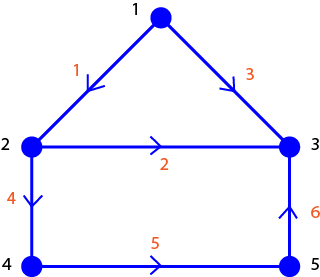

In [20]:
Image(filename = 'Graph2.png')

* Calculate the incidence matrix A
* Calculate the nullspaces of A and A<sup>T</sup>
* Calculate the trace of A<sup>T</sup>A

#### Solution

In [21]:
A = Matrix([[-1, 1, 0, 0, 0], [0, -1, 1, 0, 0], [-1, 0, 1, 0, 0], [0, -1, 0, 1, 0], [0, 0, 0, -1, 1], [0, 0, 1, 0, -1]])
A

⎡-1  1   0  0   0 ⎤
⎢                 ⎥
⎢0   -1  1  0   0 ⎥
⎢                 ⎥
⎢-1  0   1  0   0 ⎥
⎢                 ⎥
⎢0   -1  0  1   0 ⎥
⎢                 ⎥
⎢0   0   0  -1  1 ⎥
⎢                 ⎥
⎣0   0   1  0   -1⎦

In [22]:
A.rref()

⎛⎡1  0  0  0  -1⎤              ⎞
⎜⎢              ⎥              ⎟
⎜⎢0  1  0  0  -1⎥              ⎟
⎜⎢              ⎥              ⎟
⎜⎢0  0  1  0  -1⎥              ⎟
⎜⎢              ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  0  1  -1⎥              ⎟
⎜⎢              ⎥              ⎟
⎜⎢0  0  0  0  0 ⎥              ⎟
⎜⎢              ⎥              ⎟
⎝⎣0  0  0  0  0 ⎦              ⎠

* We note that we have 4 independent columns
* The dimension of the nullspace will be *n* - *r* = 5 - 4 = 1
* We will let *x*<sub>5</sub> = *s*, then from the row-reduced echelon form abobe we have
$$ { x }_{ 1 }-{ x }_{ 5 }=0\\ { x }_{ 2 }-{ x }_{ 5 }=0\\ { x }_{ 3 }-{ x }_{ 5 }=0\\ { x }_{ 4 }-{ x }_{ 5 }=0\\ \begin{bmatrix} { x }_{ 1 } \\ { x }_{ 2 } \\ { x }_{ 3 } \\ { x }_{ 4 } \\ { x }_{ 5 } \end{bmatrix}=s\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} $$

In [23]:
A.nullspace()

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎣⎣1⎦⎦

* It represents a potential difference between all nodes t be zero: A**x** = **0**
* This means that the potential at all nodes must be a constant

In [24]:
A.transpose().nullspace()

⎡⎡-1⎤  ⎡0 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥, ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦

* It is of dimension 2, as there are two independent loops
* As per Euler's formula
    * nodes - edges + loops = 1
    * 5 - 6 + 2 = 1
* This tells us about current that needs to flow so as not to accumulate current at a node
* It therefor indicates the independent loops
* It works out beautifully
    * Look at the two loops and assign flow as per the two vector columns for each edge and you will see perfect flow along either of the two independent loops with no current accumulating at any node

* We could calculate it from the row-reduced echelon for of A<sup>T</sup>

In [25]:
A.transpose().rref()

⎛⎡1  0  1  0  0  0 ⎤              ⎞
⎜⎢                 ⎥              ⎟
⎜⎢0  1  1  0  0  1 ⎥              ⎟
⎜⎢                 ⎥              ⎟
⎜⎢0  0  0  1  0  -1⎥, (0, 1, 3, 4)⎟
⎜⎢                 ⎥              ⎟
⎜⎢0  0  0  0  1  -1⎥              ⎟
⎜⎢                 ⎥              ⎟
⎝⎣0  0  0  0  0  0 ⎦              ⎠

* This gives us 4 independent columns, with dependent *y*<sub>3</sub> and *y*<sub>6</sub>
$$ y_{ 6 }=s\\ { y }_{ 3 }=t\\ { y }_{ 1 }+{ y }_{ 3 }={ y }_{ 1 }+t=0\\ \therefore \quad { y }_{ 1 }=-t\\ { y }_{ 2 }+{ y }_{ 3 }+{ y }_{ 6 }=\quad 0\\ \therefore \quad { y }_{ 2 }=-s-t\\ { y }_{ 4 }-{ y }_{ 6 }={ y }_{ 4 }-s=0\\ \therefore \quad { y }_{ 4 }=s\\ { y }_{ 5 }-{ y }_{ 6 }={ y }_{ 5 }-s=0\\ \therefore \quad { y }_{ 5 }=s\\ \begin{bmatrix} { y }_{ 1 } \\ { y }_{ 2 } \\ { y }_{ 3 } \\ { y }_{ 4 } \\ { y }_{ 5 } \\ { y }_{ 6 } \end{bmatrix}=\begin{bmatrix} -t \\ -s-t \\ t \\ s \\ s \\ s \end{bmatrix}=\begin{bmatrix} 0 \\ -s \\ 0 \\ s \\ s \\ s \end{bmatrix}+\begin{bmatrix} -t \\ -t \\ t \\ 0 \\ 0 \\ 0 \end{bmatrix}=s\begin{bmatrix} 0 \\ -1 \\ 0 \\ 1 \\ 1 \\ 1 \end{bmatrix}+t\begin{bmatrix} -1 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} $$

In [26]:
A.transpose() * A

⎡2   -1  -1  0   0 ⎤
⎢                  ⎥
⎢-1  3   -1  -1  0 ⎥
⎢                  ⎥
⎢-1  -1  3   0   -1⎥
⎢                  ⎥
⎢0   -1  0   2   -1⎥
⎢                  ⎥
⎣0   0   -1  -1  2 ⎦

In [27]:
(A.transpose() * A).trace()

12

* The degree of the node is the number of edges it has
* Look at the columns of the incidence matrix A
* Every non-trivial (non-zero) entry represents an edge
* Note that there are 2 in column 1
    * This gives us a degree of 2, which will also be the first entry on the diagonal of A<sup>T</sup>A
* Column 2 has 3 entries representing 3 edges from node 2 and an entry of 3 on the diagonal of A<sup>T</sup>A
* ... and so on
* The trace is therefor just the sum of the degree of all the nodes